# IMPORTING LIBRARIES


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)
sns.set_theme(palette="dark",style="dark" )

# classification

In [6]:
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [7]:
iris = datasets.load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
x = iris.data[:,(2,3)]

In [29]:
y = (iris["target"]==2).astype(np.float64)

In [30]:
type(y)

numpy.ndarray

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [32]:
svm_clf = Pipeline([
    ("std_scale", StandardScaler()),
    ("linear_svm", LinearSVC(loss="hinge"))
])

In [33]:
svm_clf.fit(x,y)

Pipeline(steps=[('std_scale', StandardScaler()),
                ('linear_svm', LinearSVC(loss='hinge'))])

In [34]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## non linear classification 

In [35]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

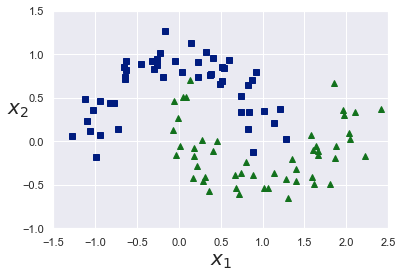

In [36]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [37]:
poly_svc = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(loss="hinge"))
])

In [38]:
poly_svc.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(loss='hinge'))])

In [41]:
poly_svc.predict([[1,-0.5]])

array([1])

Or we can use kernel trick

In [42]:
from sklearn.svm import SVC

poly_kernel_svc = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel='poly', coef0=1, C=5))
])

In [43]:
poly_kernel_svc.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [44]:
poly_kernel_svc.predict([[1,-0.5]])

array([1])